In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as tfds
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
td = pd.read_csv('./train.csv')
ed = pd.read_csv('./eval.csv')

In [3]:
td

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
...,...,...,...,...,...,...,...,...,...,...
622,0,male,28.0,0,0,10.5000,Second,unknown,Southampton,y
623,0,male,25.0,0,0,7.0500,Third,unknown,Southampton,y
624,1,female,19.0,0,0,30.0000,First,B,Southampton,y
625,0,female,28.0,1,2,23.4500,Third,unknown,Southampton,n


In [4]:
#Survived – 生存フラグ（0=死亡、1=生存）
#Sex – 性別（male=男性、female＝女性）
#Age – 年齢
#SibSp – タイタニックに同乗している兄弟/配偶者の数
#parch – タイタニックに同乗している親/子供の数
#fare – 料金
#class – チケットクラス
#deck – 客室番号
#Embarked – 出港地（タイタニックへ乗った港）

print(td.columns)
print(td.index)
print(td.shape)
print(td.dtypes)

Index(['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 'fare',
       'class', 'deck', 'embark_town', 'alone'],
      dtype='object')
RangeIndex(start=0, stop=627, step=1)
(627, 10)
survived                int64
sex                    object
age                   float64
n_siblings_spouses      int64
parch                   int64
fare                  float64
class                  object
deck                   object
embark_town            object
alone                  object
dtype: object


In [5]:
td.drop(columns = ['n_siblings_spouses','alone'] ,inplace = True)
td

,survived,sex,age,parch,fare,class,deck,embark_town
0,0,male,22.0,0,7.2500,Third,unknown,Southampton
1,1,female,38.0,0,71.2833,First,C,Cherbourg
2,1,female,26.0,0,7.9250,Third,unknown,Southampton
3,1,female,35.0,0,53.1000,First,C,Southampton
4,0,male,28.0,0,8.4583,Third,unknown,Queenstown
...,...,...,...,...,...,...,...,...
622,0,male,28.0,0,10.5000,Second,unknown,Southampton
623,0,male,25.0,0,7.0500,Third,unknown,Southampton
624,1,female,19.0,0,30.0000,First,B,Southampton
625,0,female,28.0,2,23.4500,Third,unknown,Southampton


In [6]:
td.rename(columns = {'deck': 'room_name'} ,inplace = True)
td

,survived,sex,age,parch,fare,class,room_name,embark_town
0,0,male,22.0,0,7.2500,Third,unknown,Southampton
1,1,female,38.0,0,71.2833,First,C,Cherbourg
2,1,female,26.0,0,7.9250,Third,unknown,Southampton
3,1,female,35.0,0,53.1000,First,C,Southampton
4,0,male,28.0,0,8.4583,Third,unknown,Queenstown
...,...,...,...,...,...,...,...,...
622,0,male,28.0,0,10.5000,Second,unknown,Southampton
623,0,male,25.0,0,7.0500,Third,unknown,Southampton
624,1,female,19.0,0,30.0000,First,B,Southampton
625,0,female,28.0,2,23.4500,Third,unknown,Southampton


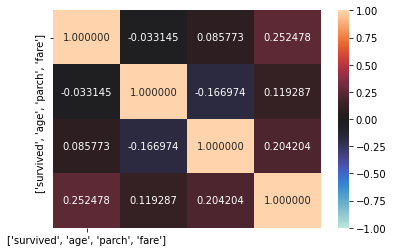

In [139]:
#相関関係行列でsurvivedと各カラムの相関関係を確認
columns = td[['survived','sex','age','parch','fare','class','room_name','embark_town']]
corr = columns.corr()

fig = plt.figure()

sns.heatmap(corr,vmin=-1.0, vmax=1.0, center=0, annot=True, fmt ='1f',xticklabels = [['survived','age','parch','fare']],yticklabels = [['survived','age','parch','fare']] )
plt.show()
fig.savefig('corr_image')
#age,parch,fareの相関係数はとても低かったため、他のカラムの分析を行う。

In [7]:
#各カラムの要素数を確認。room_nameのunknownが多すぎるため、削除する。
print(td['sex'].value_counts())
print(td['class'].value_counts())
print(td['room_name'].value_counts())
print(td['embark_town'].value_counts())
td.drop('room_name',axis = 1, inplace = True)
td

male      410
female    217
Name: sex, dtype: int64
Third     341
First     159
Second    127
Name: class, dtype: int64
unknown    481
C           43
B           37
E           23
D           22
A           11
F            6
G            4
Name: room_name, dtype: int64
Southampton    450
Cherbourg      123
Queenstown      53
unknown          1
Name: embark_town, dtype: int64


,survived,sex,age,parch,fare,class,embark_town
0,0,male,22.0,0,7.2500,Third,Southampton
1,1,female,38.0,0,71.2833,First,Cherbourg
2,1,female,26.0,0,7.9250,Third,Southampton
3,1,female,35.0,0,53.1000,First,Southampton
4,0,male,28.0,0,8.4583,Third,Queenstown
...,...,...,...,...,...,...,...
622,0,male,28.0,0,10.5000,Second,Southampton
623,0,male,25.0,0,7.0500,Third,Southampton
624,1,female,19.0,0,30.0000,First,Southampton
625,0,female,28.0,2,23.4500,Third,Southampton


In [8]:
#各要素の生存率
print(td['survived'].groupby(td['sex']).mean())
print(td['survived'].groupby(td['class']).mean())
print(td['survived'].groupby(td['embark_town']).mean())

sex
female    0.778802
male      0.180488
Name: survived, dtype: float64
class
First     0.635220
Second    0.456693
Third     0.246334
Name: survived, dtype: float64
embark_town
Cherbourg      0.593496
Queenstown     0.358491
Southampton    0.333333
unknown        1.000000
Name: survived, dtype: float64


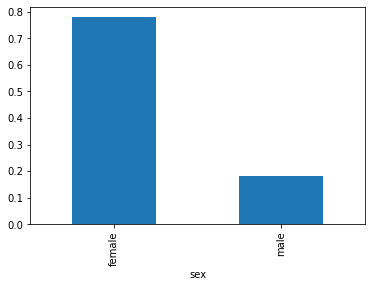

In [118]:
fig = plt.figure()
(td['survived'].groupby(td['sex']).mean()).plot.bar()
fig.savefig('survived_for_sex')

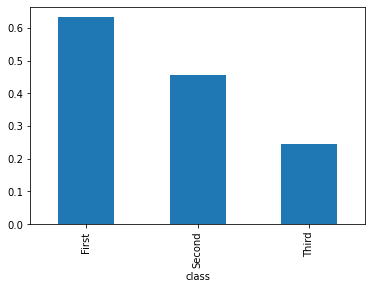

In [164]:
fig = plt.figure()
(td['survived'].groupby(td['class']).mean()).plot.bar()
fig.savefig('survived_for_class')

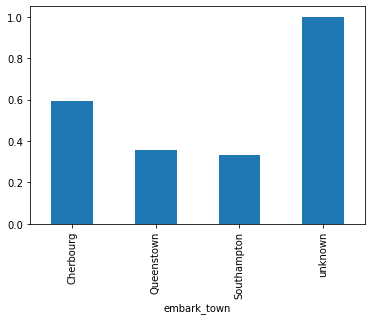

In [119]:
fig = plt.figure()
(td['survived'].groupby(td['embark_town']).mean()).plot.bar()
fig.savefig('survived_embark_town')

In [9]:
#sex,class,embark_townとsurvivedの相関係数を測るために、mapにより、数値化する。
#embark_townのunknownが生存率100％で邪魔になりそうなので、削除する。

td[td['embark_town'] == 'unknown']
map_td = td.copy()
map_td.drop(map_td.index[48],inplace=True)
map_td['embark_town'].value_counts()

Southampton    450
Cherbourg      123
Queenstown      53
Name: embark_town, dtype: int64

In [10]:
map_td.update(map_td['sex'].map({'male':1,'female':2}))
map_td.update(map_td['class'].map({'First':1,'Second':2,'Third':3}))
map_td.update(map_td['embark_town'].map({'Southampton':1,'Cherbourg':2,'Queenstown':3}))

In [11]:
map_columns = map_td[['survived','sex','class','embark_town']]
map_columns

,survived,sex,class,embark_town
0,0,1,3,1
1,1,2,1,2
2,1,2,3,1
3,1,2,1,1
4,0,1,3,3
...,...,...,...,...
622,0,1,2,1
623,0,1,3,1
624,1,2,1,1
625,0,2,3,1


In [12]:
#標準偏差が取れるほど、要素数がないため分散が出せないと仮定
corr_map = map_columns.corr()
corr_map

,survived
survived,1.0


In [13]:
td['parch'].value_counts()
#標準偏差が取れるほど、要素数がないため分散が出せないと結論づけた。

0    476
1     85
2     56
5      4
4      3
3      3
Name: parch, dtype: int64

In [14]:
print('make sort embark town')
Southamption_td = td[td['embark_town']=='Southampton']
Cherbourg_td = td[td['embark_town']=='Cherbourg']
Queenstown_td = td[td['embark_town']=='Queenstown']

make sort embark town


In [15]:
print('出発港ごとの生存確率')
print((td['survived'].groupby(td['embark_town']).mean()))
print('---------------------------')

print('Sex count of embark town')
print('Cherbourgnの男女数')
print(Cherbourg_td['sex'].value_counts())
print('Queenstownの男女数')
print(Queenstown_td['sex'].value_counts())
print('Southamptionの男女数')
print(Southamption_td['sex'].value_counts())

print('---------------------------')

print('male or female into embark town')
print('Cherbourgnの男女比')
print(Cherbourg_td['sex'].value_counts(normalize=True))
print('Queenstownの男女比')
print(Queenstown_td['sex'].value_counts(normalize=True))
print('Southamptionの男女比')
print(Southamption_td['sex'].value_counts(normalize = True))

print('以上から生存率が高い出発港の方が女性比率が高いことが分かる')

出発港ごとの生存確率
embark_town
Cherbourg      0.593496
Queenstown     0.358491
Southampton    0.333333
unknown        1.000000
Name: survived, dtype: float64
---------------------------
Sex count of embark town
Cherbourgnの男女数
male      66
female    57
Name: sex, dtype: int64
Queenstownの男女数
male      31
female    22
Name: sex, dtype: int64
Southamptionの男女数
male      313
female    137
Name: sex, dtype: int64
---------------------------
male or female into embark town
Cherbourgnの男女比
male      0.536585
female    0.463415
Name: sex, dtype: float64
Queenstownの男女比
male      0.584906
female    0.415094
Name: sex, dtype: float64
Southamptionの男女比
male      0.695556
female    0.304444
Name: sex, dtype: float64
以上から生存率が高い出発港の方が女性比率が高いことが分かる


In [16]:
print('出発港ごとの生存確率')
print((td['survived'].groupby(td['embark_town']).mean()))
print('---------------------------')

print('Class count of embark town')
print(Cherbourg_td['class'].value_counts())
print(Queenstown_td['class'].value_counts())
print(Southamption_td['class'].value_counts())

print('---------------------------')

print('male or female into embark town')
print(Cherbourg_td['class'].value_counts(normalize=True))
print(Queenstown_td['class'].value_counts(normalize=True))
print(Southamption_td['class'].value_counts(normalize = True))

print('以上から生存率が高い出発港はFirst classが多いことが分かる。')

出発港ごとの生存確率
embark_town
Cherbourg      0.593496
Queenstown     0.358491
Southampton    0.333333
unknown        1.000000
Name: survived, dtype: float64
---------------------------
Class count of embark town
First     68
Third     40
Second    15
Name: class, dtype: int64
Third     50
Second     2
First      1
Name: class, dtype: int64
Third     251
Second    110
First      89
Name: class, dtype: int64
---------------------------
male or female into embark town
First     0.552846
Third     0.325203
Second    0.121951
Name: class, dtype: float64
Third     0.943396
Second    0.037736
First     0.018868
Name: class, dtype: float64
Third     0.557778
Second    0.244444
First     0.197778
Name: class, dtype: float64
以上から生存率が高い出発港はFirst classが多いことが分かる。


In [17]:
print('乗客全体の生存確率')
td['survived'].mean()

print('-----------------')

print('生存確率を上回った出発港である、Cherbourgは女性比率が多く、first　Classの人が多かったことから生存条件に大きく関係あるのは、classとsexであると仮定できる。')

乗客全体の生存確率
-----------------
生存確率を上回った出発港である、Cherbourgは女性比率が多く、first　Classの人が多かったことから生存条件に大きく関係あるのは、classとsexであると仮定できる。


In [18]:
map_td

,survived,sex,age,parch,fare,class,embark_town
0,0,1,22.0,0,7.2500,3,1
1,1,2,38.0,0,71.2833,1,2
2,1,2,26.0,0,7.9250,3,1
3,1,2,35.0,0,53.1000,1,1
4,0,1,28.0,0,8.4583,3,3
...,...,...,...,...,...,...,...
622,0,1,28.0,0,10.5000,2,1
623,0,1,25.0,0,7.0500,3,1
624,1,2,19.0,0,30.0000,1,1
625,0,2,28.0,2,23.4500,3,1


In [19]:
y_train = []
x_train = []
x_train = map_td[['sex','age','parch','class','embark_town']]
y_train = map_td['survived']

In [20]:
x_train.to_csv('x_train_fare_others.csv',index=False)
y_train.to_csv('y_train_fare_others.csv',index=False)